OpenCV keypoints: 19893
Custom keypoints: 6553
Angles sample: [217.3895263671875, 181.96881103515625, 127.19791412353516, 78.87860870361328, 137.4297637939453, 139.4196319580078, 359.7091979980469, 152.7252197265625, 204.62738037109375, 159.30862426757812] Sizes sample: [2.733912706375122, 2.550691843032837, 2.7706491947174072, 2.7501413822174072, 2.6403756141662598, 2.6290860176086426, 2.766556739807129, 2.7454171180725098, 2.6816177368164062, 2.580393075942993]


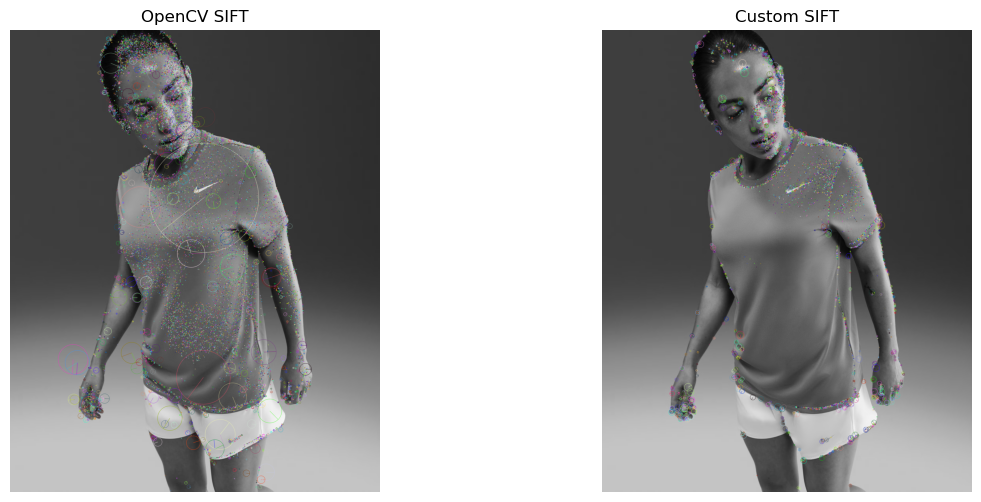

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

sys.path.append("../src")

import sift
importlib.reload(sift)

img = cv2.imread("../Cloth/nike_shirt5.png", cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

cv_sift = cv2.SIFT_create(
    nOctaveLayers=7,
    contrastThreshold=0.01,
    sigma=1.414
)

kp_cv, desc_cv = cv_sift.detectAndCompute(img, None)
print(f"OpenCV keypoints: {len(kp_cv)}")

sift.init(
    layer_count=7,
    contrast_threshold=0.01,
    sigma=1.2
)

kp_c, desc_c = sift.calc_sift(img)

print(f"Custom keypoints: {len(kp_c)}")
print(
    "Angles sample:",
    [kp.angle for kp in kp_c[:10]],
    "Sizes sample:",
    [kp.size for kp in kp_c[:10]],
)

img_cv = cv2.drawKeypoints(
    img,
    kp_cv,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

img_c = cv2.drawKeypoints(
    img,
    kp_c,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("OpenCV SIFT")
plt.imshow(img_cv, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Custom SIFT")
plt.imshow(img_c, cmap="gray")
plt.axis("off")

plt.show()